In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data1 = data.drop(['City.Population'],axis=1)
data1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [7]:
data1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
y1 = np.empty(600,dtype=object)
i = 0
for val in data1['Taxable.Income']:
  if val<=30000:
    y1[i]='Risky'
  else:
    y1[i]='Good'
  i=i+1

In [9]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [51]:
t1 = pd.DataFrame(y1,columns=['Target'])
t1.head()

,Target
0,Good
1,Good
2,Good
3,Good
4,Good


In [11]:
data2 = pd.concat([data1,t1],axis=1)
data2.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


#EDA

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [13]:
data2.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


In [14]:
data2.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience',
       'Urban', 'Target'],
      dtype='object')

In [15]:
label_en = preprocessing.LabelEncoder()
data2['Undergrad'] = label_en.fit_transform(data2['Undergrad'])
data2['Marital.Status'] = label_en.fit_transform(data2['Marital.Status'])
data2['Urban'] = label_en.fit_transform(data2['Urban'])
data2['Target'] = label_en.fit_transform(data2['Target'])

In [16]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [17]:
colnames = list(data2.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

#Visualization

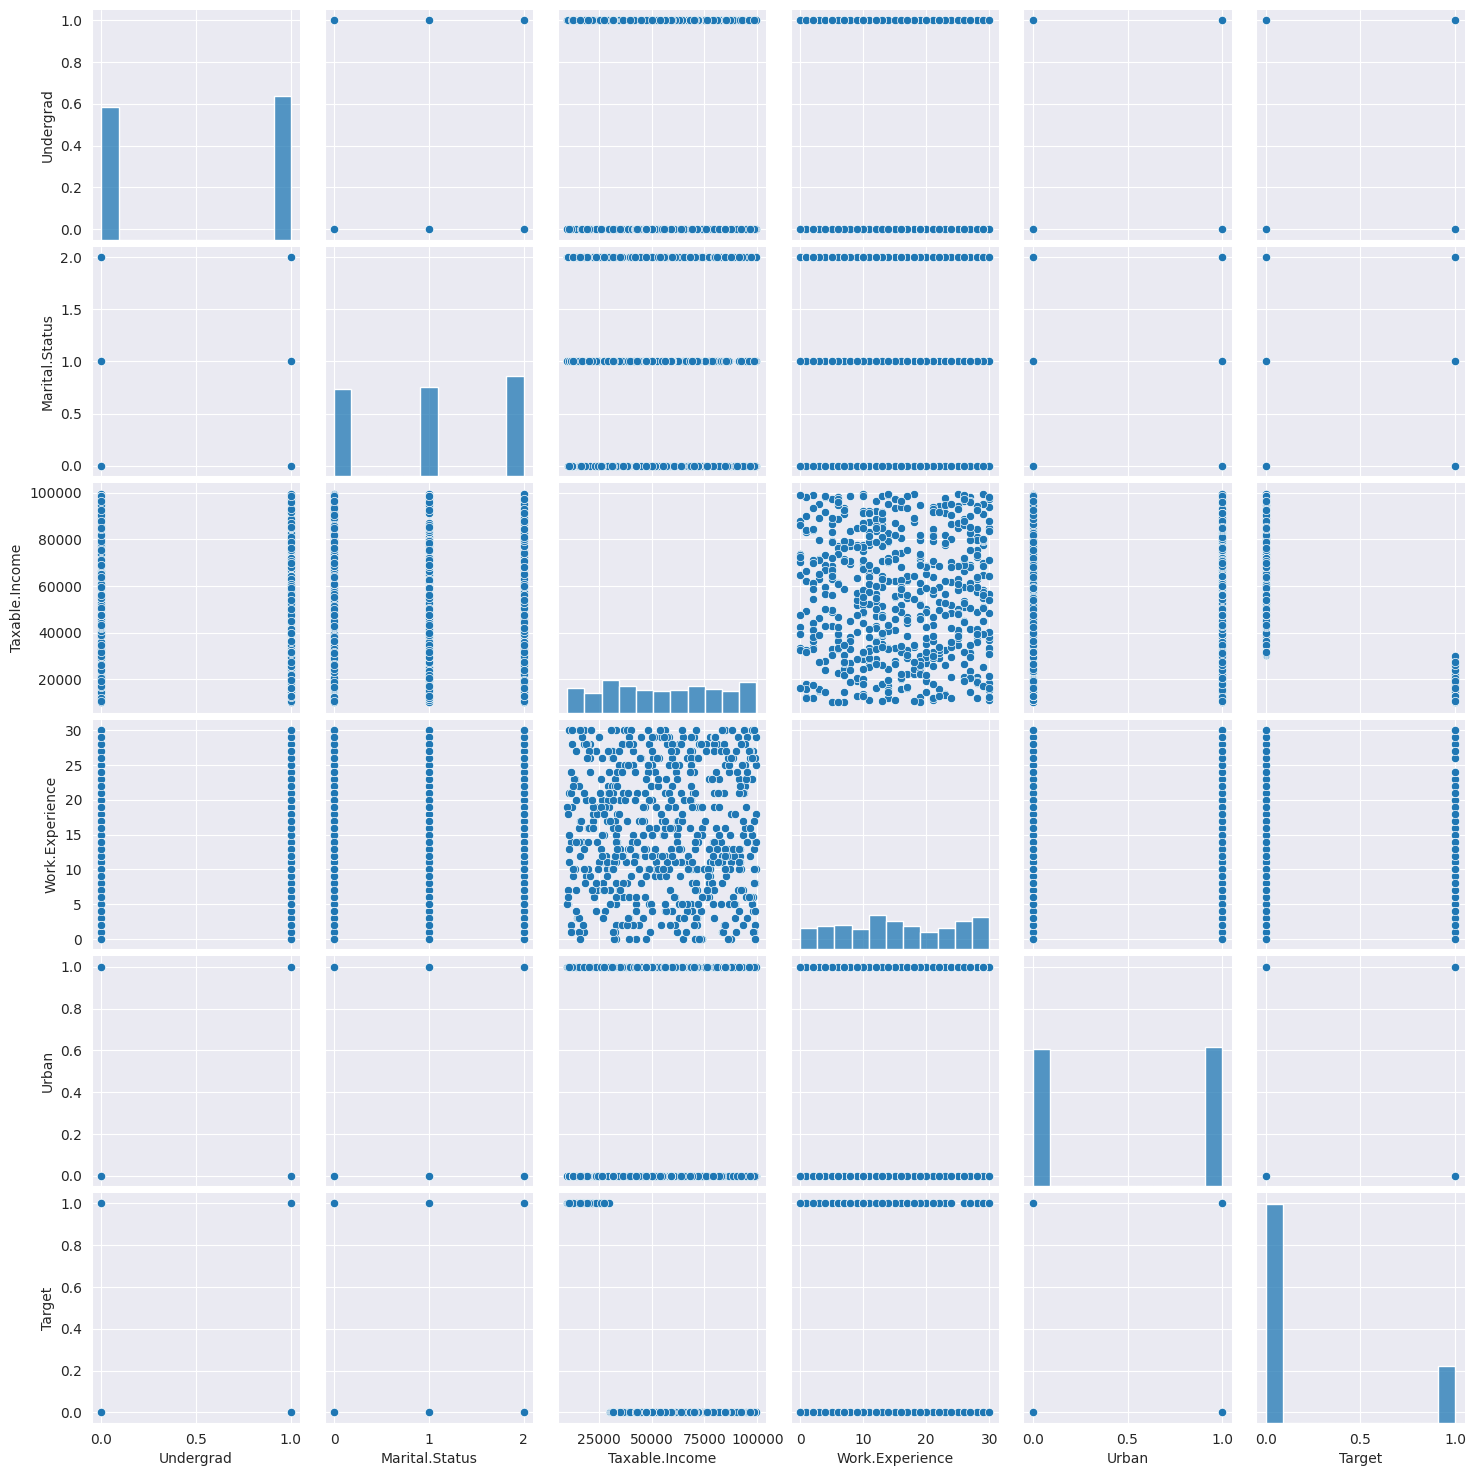

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(data2)

<ipython-input-19-7e7942709e99>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

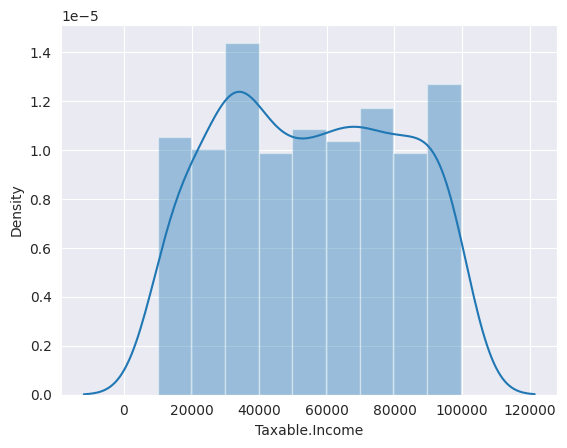

In [19]:
sns.distplot(data2['Taxable.Income'])

<ipython-input-20-047d991b8c0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Work.Experience'])


<Axes: xlabel='Work.Experience', ylabel='Density'>

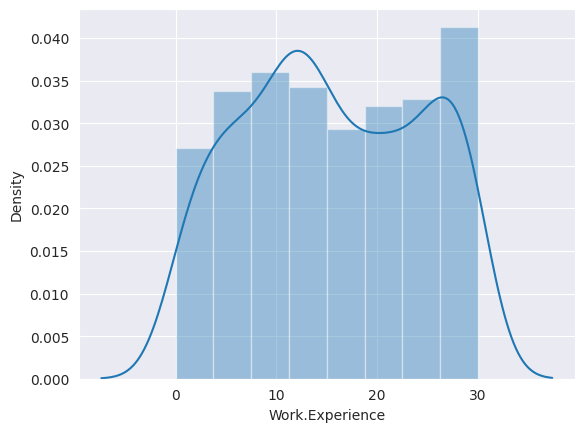

In [20]:
sns.distplot(data2['Work.Experience'])

<Axes: >

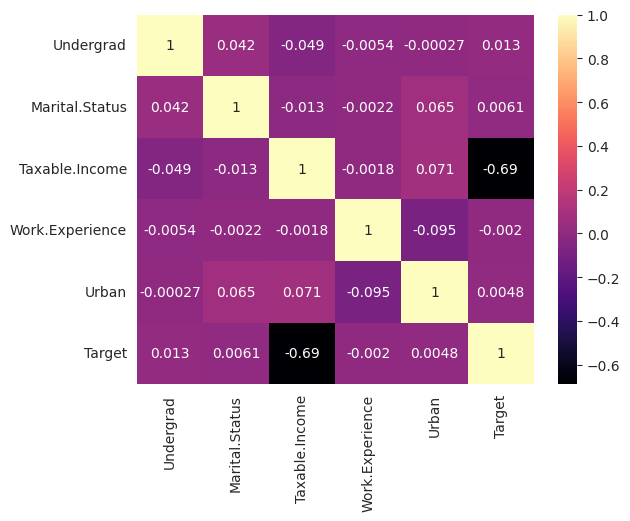

In [21]:
sns.heatmap(data2.corr(),cmap='magma',annot=True)

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

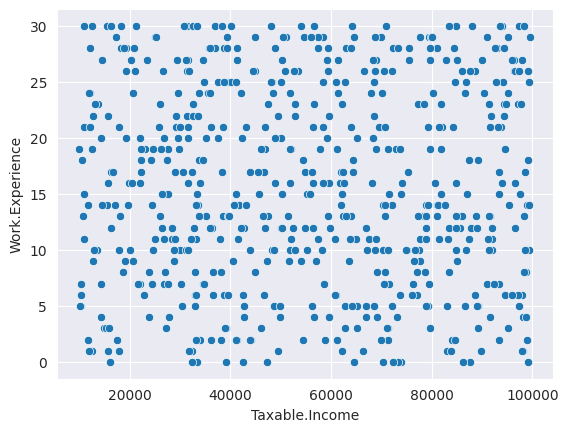

In [22]:
sns.scatterplot(x='Taxable.Income',y='Work.Experience',data=data2)

In [23]:
x = data2.iloc[:,0:5]
y = data2[['Target']]
#x.head()
#y.head()

#Building a decision tree based on entropy criteria

In [24]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)

In [25]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'x[2] <= 30055.5\nentropy = 0.754\nsamples = 420\nvalue = [329, 91]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 91\nvalue = [0, 91]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 329\nvalue = [329, 0]')]

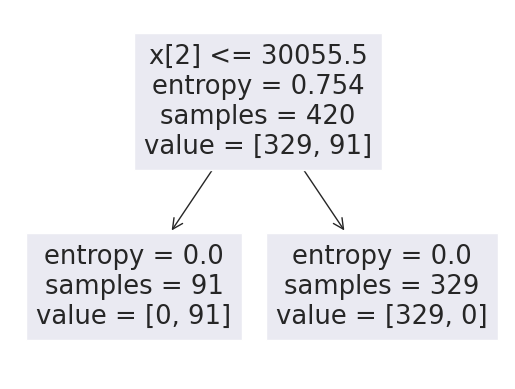

In [26]:
tree.plot_tree(model)

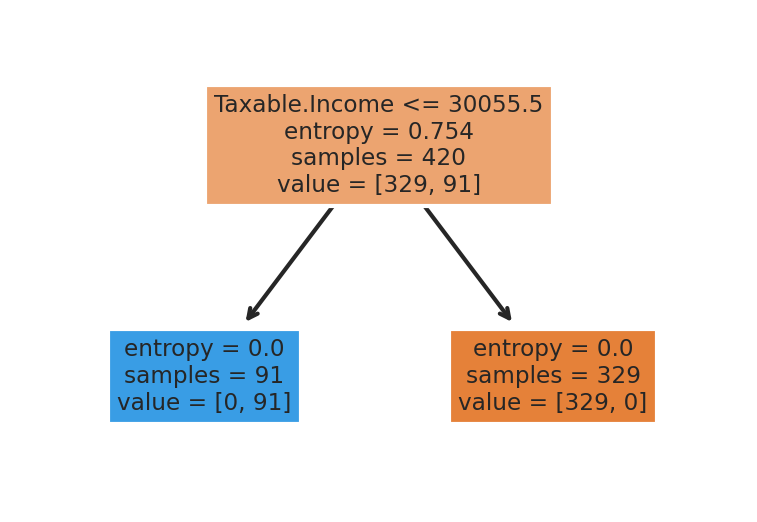

In [27]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               filled = True);

In [28]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    147
1     33
dtype: int64

In [29]:
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [52]:
y_test.head()

,Target
522,0
162,0
426,0
346,1
545,0


In [31]:
y_test2 = y_test.to_numpy()
y_test2 = np.reshape(y_test2,180)
y_test2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [32]:
# Two-way tabel to understand correctly predicted values as well as the errors.
pd.crosstab(y_test2,preds)

col_0,0,1
row_0,,
0,147,0
1,0,33


#Building a decision based on Gini impurity criteria.

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [34]:
model2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.75, 'x[2] <= 29949.5\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 384\nvalue = [384, 0]')]

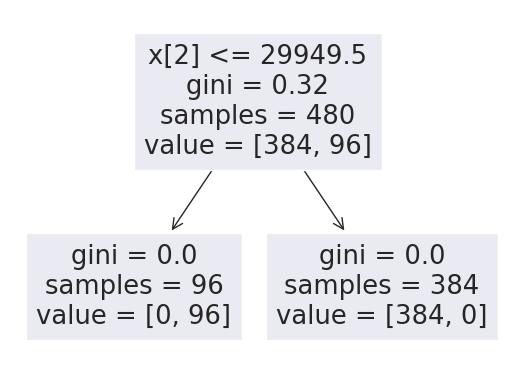

In [35]:
tree.plot_tree(model2)

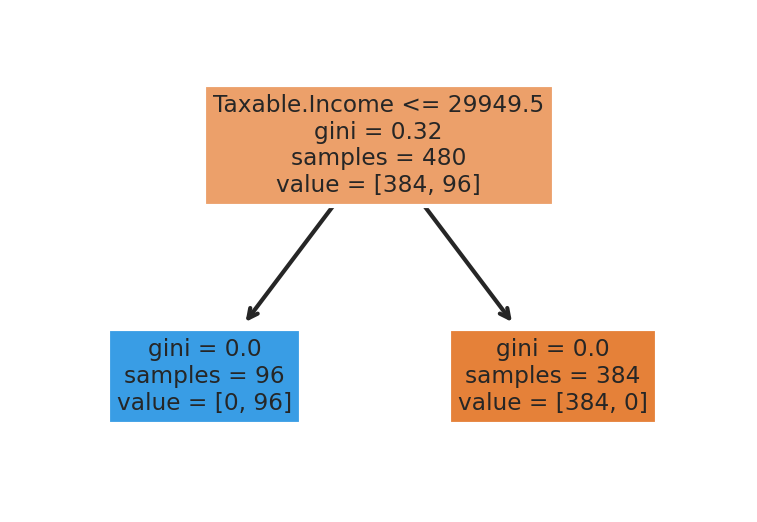

In [36]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model2,
               feature_names = fn,
               filled = True);

In [37]:
y_test.head()

,Target
159,0
307,0
253,0
528,0
137,1


In [38]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3,120)
y_test3

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
#Prediction and computing the accuracy
pred=model2.predict(x_test)
np.mean(pred==y_test3)

1.0

#Decision Tree Regression

In [40]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

In [42]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)

DecisionTreeRegressor()

[Text(0.5, 0.75, 'x[2] <= 30055.5\nsquared_error = 0.167\nsamples = 420\nvalue = 0.212'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 89\nvalue = 1.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 331\nvalue = 0.0')]

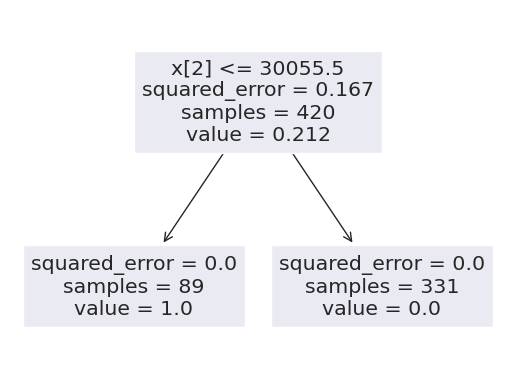

In [43]:
tree.plot_tree(model3)

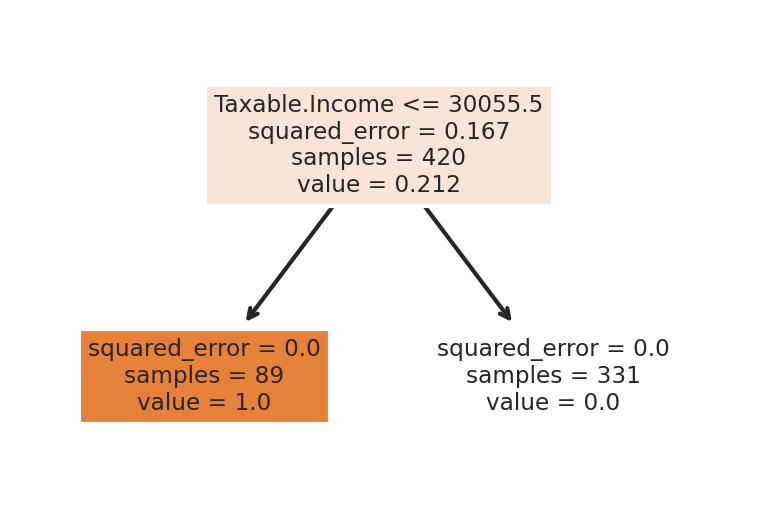

In [44]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model3,
               feature_names = fn,
               filled = True);

In [45]:
y_test.head()

,Target
522,0
162,0
426,0
346,1
545,0


In [46]:
y_test4 = y_test.to_numpy()
y_test4 = np.reshape(y_test4,180)
y_test4

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [47]:
#Prediction and computing the accuracy
pred3=model3.predict(x_test)
np.mean(pred3==y_test4)

1.0

#Install ppscore library

In [48]:
!pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=1d1fd5e0cdb97180c2517aacf4971f5d696fbf3ae4100e36dfc277906ebee466
  Stored in directory: /root/.cache/pip/wheels/d8/2d/fc/c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


#Calculate ppscore

In [49]:
import ppscore as pps
pps.matrix(data2)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Undergrad,Undergrad,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Undergrad,Marital.Status,0.000000,regression,True,mean absolute error,0.676667,0.689966,DecisionTreeRegressor()
2,Undergrad,Taxable.Income,0.000000,regression,True,mean absolute error,22771.961667,22779.973615,DecisionTreeRegressor()
3,Undergrad,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,7.710043,DecisionTreeRegressor()
4,Undergrad,Urban,0.000000,regression,True,mean absolute error,0.496667,0.501345,DecisionTreeRegressor()
5,Undergrad,Target,0.000000,regression,True,mean absolute error,0.206667,0.328352,DecisionTreeRegressor()
6,Marital.Status,Undergrad,0.000000,regression,True,mean absolute error,0.480000,0.499927,DecisionTreeRegressor()
7,Marital.Status,Marital.Status,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,Marital.Status,Taxable.Income,0.007396,regression,True,mean absolute error,22771.961667,22603.545807,DecisionTreeRegressor()
9,Marital.Status,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,7.701853,DecisionTreeRegressor()


In [50]:
pps.score(data2,'Target','Taxable.Income')

{'x': 'Target',
 'y': 'Taxable.Income',
 'ppscore': 0.31177712507621513,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 22771.961666666666,
 'model_score': 15672.184925887557,
 'model': DecisionTreeRegressor()}

As the pps matrix suggests the best model here is the Decision Tree Regression